In [14]:
from pyproj import Proj, Transformer

def transform_points(cartesian_points):
    # Define the WGS84 geographic coordinate system
    proj_wgs84 = Proj(proj='latlong', datum='WGS84')

    # Define a local Cartesian projection centered at 0 degrees lat, 0 degrees lon
    proj_cartesian = Proj(proj='aeqd', lat_0=0, lon_0=0, datum='WGS84', units='m')

    # Create a transformer to convert from Cartesian to WGS84 geographic coordinates
    transformer = Transformer.from_proj(proj_cartesian, proj_wgs84)

    # Convert the Cartesian coordinates to latitude and longitude
    geo_points = [transformer.transform(y, x) for x, y in cartesian_points]

    # Prepare the OSM XML content
    osm_xml_content = '<osm version="0.6" generator="Custom Script">\n'
    for idx, (lat, lon) in enumerate(geo_points, start=1):
        osm_xml_content += f'  <node id="{idx}" lat="{lat}" lon="{lon}" />\n'
    osm_xml_content += '</osm>'

    # Print the OSM XML content
    print(osm_xml_content)


# List of Cartesian coordinates to be converted
cartesian_points = [(3, 1), 
                    (2, 1), 
                    (1, 1), 
                    (1, 2),
                    (1, 3),
                    (3, 0),
                    (2, 0),
                    (1, 0),
                    (0, 0),
                    (0, 1),
                    (0, 2),
                    (0, 3)]

transform_points(cartesian_points)

<osm version="0.6" generator="Custom Script">
  <node id="1" lat="8.98315284119588e-06" lon="2.713108431151133e-05" />
  <node id="2" lat="8.98315284119551e-06" lon="1.808738954100756e-05" />
  <node id="3" lat="8.983152841195287e-06" lon="9.043694770503783e-06" />
  <node id="4" lat="1.7966305682390574e-05" lon="9.043694770503674e-06" />
  <node id="5" lat="2.694945852358587e-05" lon="9.043694770503486e-06" />
  <node id="6" lat="0.0" lon="2.713108431151144e-05" />
  <node id="7" lat="0.0" lon="1.8087389541007637e-05" />
  <node id="8" lat="0.0" lon="9.043694770503822e-06" />
  <node id="9" lat="0.0" lon="0.0" />
  <node id="10" lat="8.983152841195212e-06" lon="0.0" />
  <node id="11" lat="1.7966305682390428e-05" lon="0.0" />
  <node id="12" lat="2.6949458523585642e-05" lon="0.0" />
</osm>


<osm version="0.6" generator="Custom Script">
  <node id="1" lat="0.0" lon="2.713108431151144e-05" />
  <node id="2" lat="0.0" lon="2.2609236926259536e-05" />
  <node id="3" lat="0.0" lon="1.8087389541007637e-05" />
  <node id="4" lat="0.0" lon="1.3565542155755728e-05" />
  <node id="5" lat="0.0" lon="9.043694770503822e-06" />
  <node id="6" lat="0.0" lon="3.165293169676337e-06" />
  <node id="7" lat="0.0" lon="0.0" />
  <node id="8" lat="3.1441034944183257e-06" lon="0.0" />
  <node id="9" lat="3.1441034944185586e-06" lon="2.713108431151143e-05" />
  <node id="10" lat="3.144103494418488e-06" lon="2.260923692625953e-05" />
  <node id="11" lat="3.1441034944184278e-06" lon="1.808738954100762e-05" />
  <node id="12" lat="3.144103494418383e-06" lon="1.356554215575572e-05" />
  <node id="13" lat="3.1441034944183503e-06" lon="9.043694770503815e-06" />
  <node id="14" lat="3.1441034944183274e-06" lon="3.165293169676335e-06" />
  <node id="15" lat="8.983152841195212e-06" lon="0.0" />
  <node id

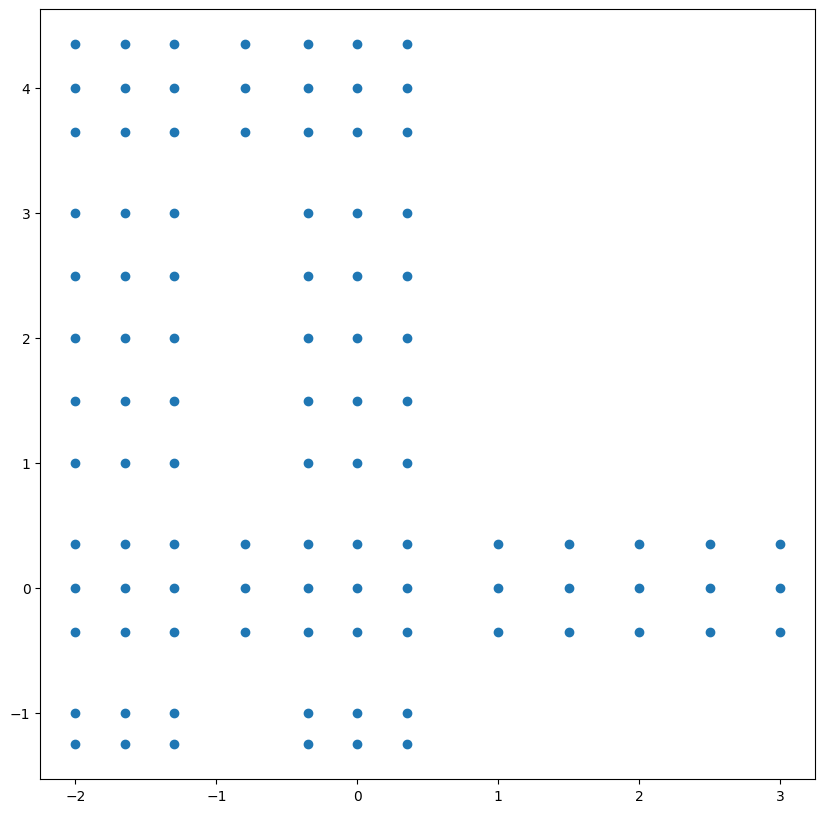

In [19]:
import matplotlib.pyplot as plt

points = [[3, 0],
          [2.5, 0],
          [2, 0],
          [1.5, 0],
          [1, 0],
          [0.35, 0],
          [0, 0],
          [0, 0.35],
          [3, 0.35],
          [2.5, 0.35],
          [2, 0.35],
          [1.5, 0.35],
          [1, 0.35],
          [0.35, 0.35],
          [0, 1],
          [0, 1.5],
          [0, 2],
          [0, 2.5],
          [0, 3],
          [0, 3.65],
          [0, 4],
          [0.35, 1],
          [0.35, 1.5],
          [0.35, 2],
          [0.35, 2.5],
          [0.35, 3],
          [0.35, 3.65],
          [0.35, 4],
          [0.35, 4.35],
          [0, 4.35],
          [-0.35, 4],
          [-0.8, 4],
          [-1.3, 4],
          [-1.65, 4],
          [-0.35, 4.35],
          [-0.8, 4.35],
          [-1.3, 4.35],
          [-1.65, 4.35],
          [-2, 4.35],
          [-2, 4],
          [-1.65, 3.65],
          [-1.65, 3],
          [-1.65, 2.5],
          [-1.65, 2],
          [-1.65, 1.5],
          [-1.65, 1],
          [-1.65, 0.35],
          [-1.65, 0],
          [-2, 3.65],
          [-2, 3],
          [-2, 2.5],
          [-2, 2],
          [-2, 1.5],
          [-2, 1],
          [-2, 0.35],
          [-2, 0],
          [-1.65, -0.35],
          [-1.65, -1],
          [-1.65, -1.25],
          [-2, -0.35],
          [-2, -1],
          [-2, -1.25],
          [-1.3, 0],
          [-0.8, 0],
          [-0.35, 0],
          [-1.3, -0.35],
          [-0.8, -0.35],
          [-0.35, -0.35],
          [0, -0.35],
          [3, -0.35],
          [2.5, -0.35],
          [2, -0.35],
          [1.5, -0.35],
          [1, -0.35],
          [0.35, -0.35],
          [0.35, -1],
          [0.35, -1.25],
          [0, -1],
          [0, -1.25],
          [-0.35, -1],
          [-0.35, -1.25],
          [-1.3, -1],
          [-1.3, -1.25],
          [-0.35, 0.35],
          [-0.35, 1],
          [-0.35, 1.5],
          [-0.35, 2],
          [-0.35, 2.5],
          [-0.35, 3],
          [-0.35, 3.65],
          [-1.3, 0.35],
          [-1.3, 1],
          [-1.3, 1.5],
          [-1.3, 2],
          [-1.3, 2.5],
          [-1.3, 3],
          [-1.3, 3.65],
          [-0.8, 0.35],
          [-0.8, 3.65]
          ]

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.plot([x for x, y in points], [y for x, y in points], 'o')

transform_points(points)

In [53]:
import lanelet2
from pyproj import Proj, transform

# Define the projector with the origin
projector = lanelet2.projection.UtmProjector(lanelet2.io.Origin(0, 0))

# Load the map using Lanelet2
map = lanelet2.io.load("test.osm", projector)

# for points in map.pointLayer:
#     print(points)

lanelet_1 = map.laneletLayer[1]
lanelet_2 = map.laneletLayer[2]

for point in list(lanelet_2.centerline):
    print(point.x, point.y)

print()
for point in list(lanelet_1.centerline):
    print(point.x, point.y)

# traffic_rules = lanelet2.traffic_rules.create(lanelet2.traffic_rules.Locations.Germany,
#                                                   lanelet2.traffic_rules.Participants.Vehicle)
# routing_graph = lanelet2.routing.RoutingGraph(map, traffic_rules)
# route = routing_graph.getRoute(lanelet_1, lanelet_2)
# for lanelet_relation in route.followingRelations(lanelet_1):
#     print(lanelet_relation.lanelet.id)

0.503863619727781 2.982840329336403
0.5038636095123366 2.4857002723768997
0.5038635993259959 1.988560219557601
0.5038635932141915 1.491420162598098
0.5038635871023871 0.9942801097788005
0.5038635850360151 0.49714005281929763

0.5038635850360151 0.49714005281929763
1.0077271680056583 0.49714005281929763
1.51159074678435 0.49714005281929763
2.0154543255339377 0.4971400486791132
2.519317900092574 0.4971400486791132
3.023181474680314 0.4971400445389494
